In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

Download the Dataset
Download the Dataset from the following link:
https://www.kaggle.com/mirichoi0218/insurance/download
Reading the Dataset
Reading the Dataset
Read the dataset into a Pandas DataFrame!
Does the dataset include any missing values? If so, drop them!
Hint: Pandas can do that with one line of code!

In [3]:
breast_cancer = pd.read_csv('insurance.csv')
breast_cancer = breast_cancer.dropna()

In [7]:
print(breast_cancer.dtypes)
breast_cancer.head(2)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


Preprocessing
Perform any needed pre-processing on the chosen features including:
Scaling;
Encoding;
Dealing with Nan values; and
Normalization.

In [8]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
y = breast_cancer.charges.values
selected_X=breast_cancer.drop(['charges'], axis = 1).values
encoded_X =OrdinalEncoder().fit_transform(selected_X)
encoded_X = StandardScaler().fit_transform(encoded_X)

Visualization
You are needed to deliver a number of visualization for your dataset, including:
Pair Plots for the features.
Correlation Matrix heat map.
Box plots for the features.
Hint: Feel Free to add the visualizations you would like!

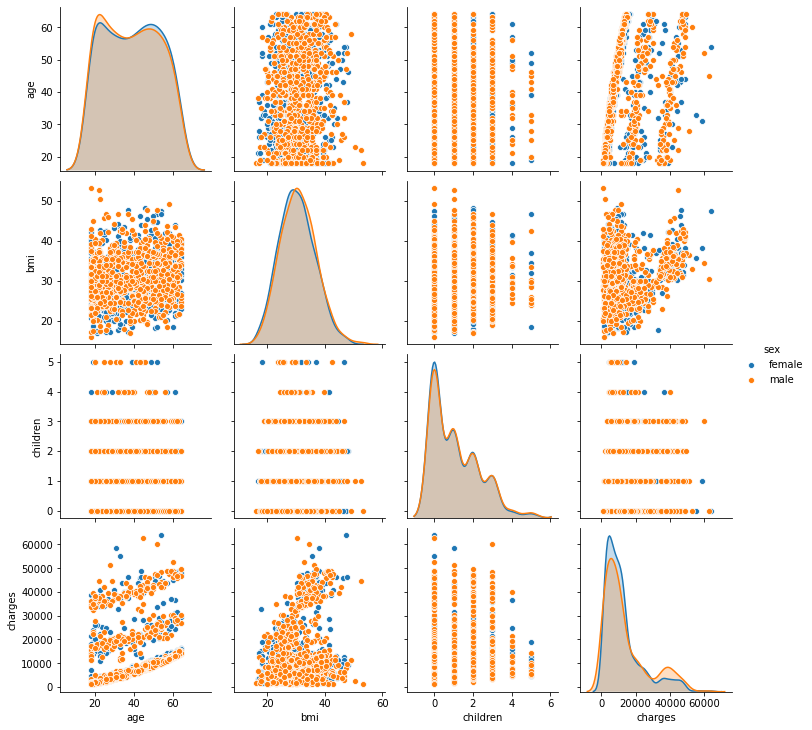

In [17]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
#oloring the figures based on a categorical variable like 'sex'
sns.pairplot(breast_cancer, hue = 'sex')

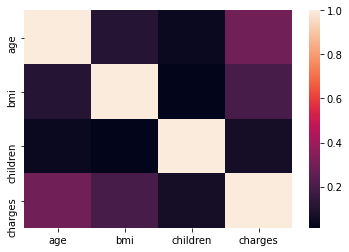

In [19]:
#Correlation Matrix heat map.
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(breast_cancer.corr())

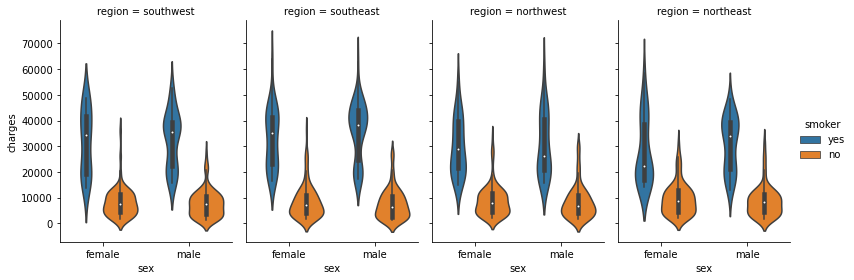

In [31]:
#Box plots for the features
import seaborn as sns
g= sns.catplot(x = 'sex', y = 'charges', 
                  hue = 'smoker', col = 'region',
               data = breast_cancer,
              kind="violin", split=False,
                height=4, aspect=.7)

Splitting the Data
Split your data as follows:
80% training set
10% Validation set
10% Test set

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=0)

Training Regressors
Use Decision trees, Random Forests and Support Vector Regressions (SVRs) to fit your data.
Get r2 scores, Mean Square Error (MSE) scores and Mean Absolute Error (MAE) scores. You need a minimum r2 score of 82%
Compare the results of different models.
Hint: You need to choose the optimal value for the criterion for both decision trees and random forests using cross-validation.

In [37]:
#Use Decision trees
from sklearn.tree import DecisionTreeRegressor
#and “mae” for the mean absolute error,
model = DecisionTreeRegressor(criterion = 'mse',random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#model.score returns the R square of the prediction
score = model.score(X_test, y_test)
    
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
print('r2_score' + str(r2_score(y_test, y_pred)))
print(f'R square is {score}')

MAE: 3576.0073636567163
MAE: 3576.0073636567163
r2_score0.7633763635973025
R square is 0.7633763635973025


In [39]:
#Random Forests
from sklearn.ensemble import RandomForestRegressor
#and “mae” for the mean absolute error,
model = RandomForestRegressor(n_estimators = 25, criterion = 'mse',random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#model.score returns the R square of the prediction
score = model.score(X_test, y_test)
    
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
print('r2_score' + str(r2_score(y_test, y_pred)))
print(f'R square is {score}')

MAE: 2700.1940747185076
MAE: 2700.1940747185076
r2_score0.8942107278520847
R square is 0.8942107278520847


In [ ]:
#Support Vector Regressions (SVRs) to fit your data
from sklearn.svm import SVR
reg = SVR(kernel = 'linear', C =1.0, gamma = 'auto')
reg.fit(X_train, y_train)
y_pred = model.predict(X_test)
#model.score returns the R square of the prediction
score = model.score(X_test, y_test)
    
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
print('r2_score' + str(r2_score(y_test, y_pred)))
print(f'R square is {score}')